# Import Necessary Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import tools from Scikit-learn

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Dataset

In [43]:
file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_name)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.shape

(7043, 21)

In [45]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# Exploratory Data Analysis (EDA)

## Check for missing values and Data Manipulation

The 'TotalCharges' column is of type 'object' but should be numeric.

In [46]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [74]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Let's fill them with the median.

In [48]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [75]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Data Visualization

### Visualize the proportion of customers who churned vs. those who did not

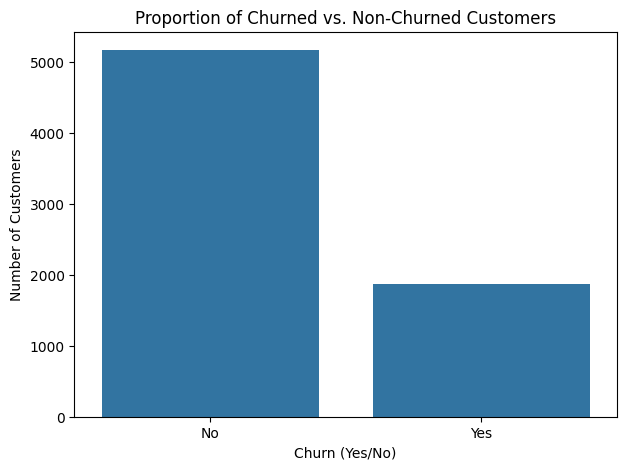

In [50]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df)
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()

### Visualize the distribution of Monthly Charges

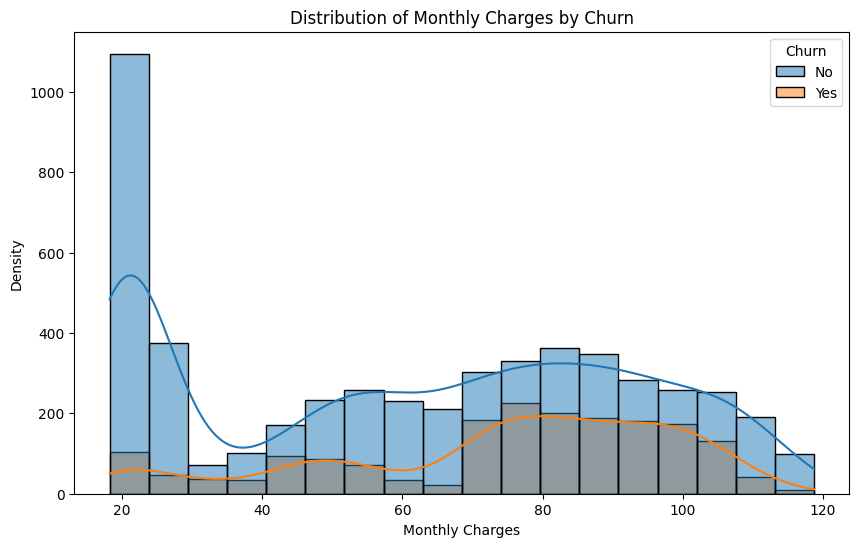

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

### Visualize the effect of Contract Type on Churn

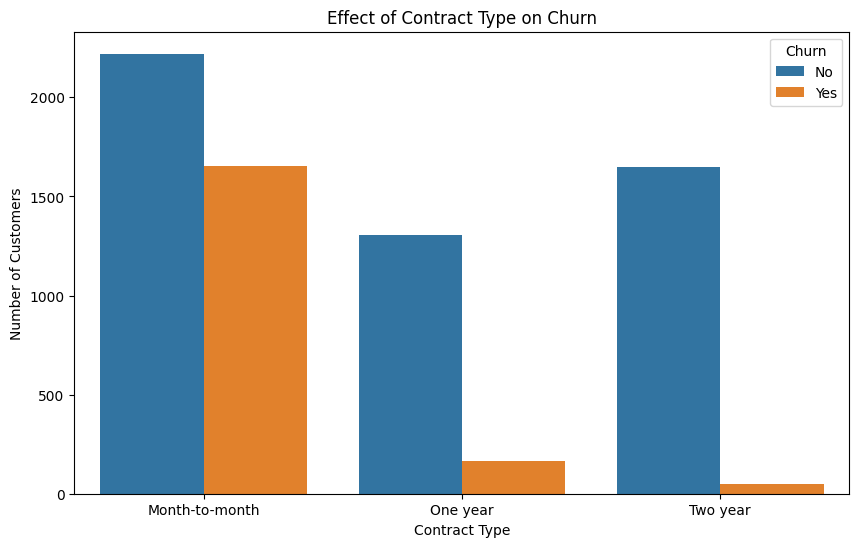

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Effect of Contract Type on Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# Data Preprocessing

Drop the customerID column as it is not needed for prediction

In [53]:
df_processed = df.drop('customerID', axis=1)

In [54]:
df_processed.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Convert the target variable 'Churn' into a numerical format (Yes=1, No=0)

In [55]:
df_processed['Churn'] = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
df_processed.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


Separate features (X) and the target variable (y)

In [57]:
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

Identify numerical and categorical features

In [58]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [59]:
print(list(numeric_features))

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [60]:
print(list(categorical_features))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


**Create a preprocessor object**
- For numerical features: Use StandardScaler to scale the data.
- For categorical features: Use OneHotEncoder to convert them to numbers.

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split Data and Build Machine Learning Models

Split the data into a training set (80%) and a testing set (20%)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5634, 19)
Testing set size: (1409, 19)


## Model 1: Logistic Regression

In [64]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
# Train the model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

## Model 2: Random Forest

In [65]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Model 3: Gradient Boosting

In [66]:
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

# Train the model
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

# Model Evaluation

## Evaluate the Logistic Regression Model

In [77]:
y_pred_lr = lr_pipeline.predict(X_test)

print("Results from Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Results from Logistic Regression
Accuracy: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Display the Confusion Matrix

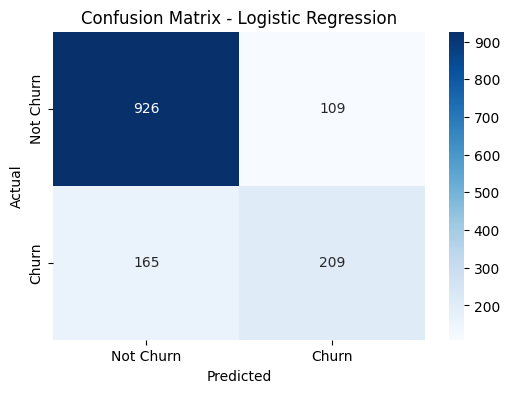

In [68]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Evaluate the Random Forest Model

In [69]:
y_pred_rf = rf_pipeline.predict(X_test)

print("Results from Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Results from Random Forest
Accuracy: 0.7779

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



### Display the Confusion Matrix

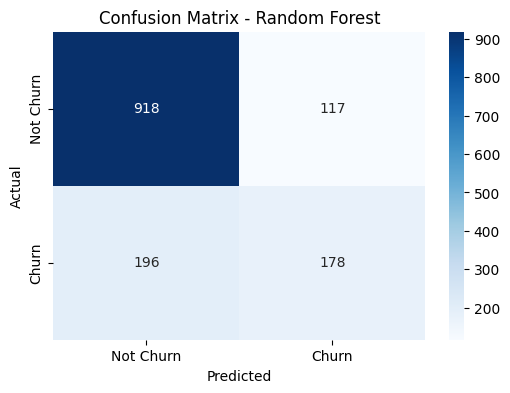

In [70]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Evaluate the Gradient Boosting Model

In [71]:
y_pred_gb = gb_pipeline.predict(X_test)

print("Results from Gradient Boosting")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Results from Gradient Boosting
Accuracy: 0.8062

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Display the Confusion Matrix

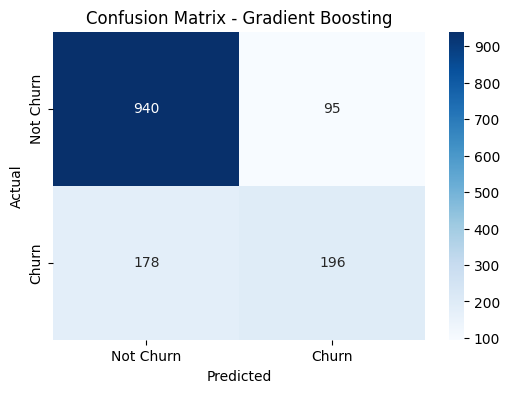

In [72]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Compare Model & Select Best Model

In [73]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
predictions = [y_pred_lr, y_pred_rf, y_pred_gb]

comparison_data = []

for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_score_1 = report['1']['f1-score']

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (Churn=1)': precision_1,
        'Recall (Churn=1)': recall_1,
        'F1-score (Churn=1)': f1_score_1
    })

comparison_df = pd.DataFrame(comparison_data)


print("Model Performance Comparison:")
print()
comparison_df

Model Performance Comparison:



,Model,Accuracy,Precision (Churn=1),Recall (Churn=1),F1-score (Churn=1)
0,Logistic Regression,0.805536,0.657233,0.558824,0.604046
1,Random Forest,0.777857,0.603390,0.475936,0.532138
2,Gradient Boosting,0.806246,0.673540,0.524064,0.589474


Based on the evaluation results, Logistic Regression is selected as the preferred model. While Gradient Boosting shows slightly higher precision for identifying churners, Logistic Regression demonstrates the best performance in both Recall and F1-score . Since finding most of the customers who might churn is often very important for customer retention plans, Logistic Regression's superior Recall and balanced F1-score, combined with its high overall accuracy , make it the most suitable choice for this specific churn prediction task.